# Tutoriel basic

Ce tutoriel a pour but de vous permettre de faire un premier pas dans le monde de [Pytorch](https://pytorch.org) ! Il est fortement inspiré de ce [tutoriel](https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/).

On utilisera **des modèles pré-entraînés pour la classification d'images**

Les modèles pré-entraîné sont des modèles de réseaux de neurones entrainés sur de grands ensembles de données (comme ImageNet, qui contient plus de 14 millions d'images appartenant à différentes classes). Le but des modèles pré-entraînés est de prédire la classe (ou étiquettes) d'une image en entrée. Il comprend les principales étapes suivantes :

- Lecture de l'image d'entrée
- Effectuer des transformations sur l'image, par exemple redimensionner, recadrer, normaliser, etc.
- Execution du modèle par une "Passe avant" : Utilise les poids pré-entraînés pour trouver le vecteur de sortie. Chaque élément de ce vecteur de sortie décrit la confiance (de 0 à 1) avec laquelle le modèle prédit que l'image d'entrée appartient à une classe particulière.
- Sur la base des scores obtenus, afficher les prédictions.

## étape 1 : Chargement d'un réseau pré-entraîné à l'aide de TorchVision

``TorchVision`` est une sous-librairie de ``pytorch``. Il se compose d'ensembles de données populaires, d'architectures de modèles et de transformations d'images communes pour la vision par ordinateur. Les diffèrents modèles disponiblent se trouve ici : [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html)

**Comment décider quel modèle choisir pour une tâche particulière ?**

Les modèles pré-entrainés peuvent être comparé sur la base des critères suivants :

- Erreur Top-1 : Une erreur top-1 se produit si la classe prédite par un modèle avec la plus grande confiance n'est pas la même que la vraie classe.
- Erreur Top-5 : Une erreur top-5 se produit lorsque la vraie classe n'est pas parmi les 5 premières classes prédites par un modèle (triées en termes de confiance).
- Temps d'inférence sur CPU : Le temps d'inférence est le temps pris pour l'étape d'inférence du modèle.
- Temps d'inférence sur GPU
- Taille du modèle : Ici la taille représente l'espace physique occupé par le fichier.pth du modèle préformé fourni par PyTorch.

Un bon modèle aura une erreur Top-1 faible, une erreur Top-5 faible, un temps d'inférence faible sur le CPU et le GPU et une taille de modèle faible.

veuillez definir le modèle pré-entrainé que vous voulez utiliser en utilisant un des modèles prédéfinit dans torchvision que vous appelerez `model`

**indices :** [`torchvision.models`](https://pytorch.org/docs/stable/torchvision/models.html)

**Solution :**

Dans un premier temps affichont les différents modèles et architectures disponibles.

In [1]:
import torchvision.models as models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

On peut voir qu'il y a une entrée `AlexNet` et une autre `alexnet`. Les noms commencant par une majuscule sont des classes Python (AlexNet) alors qu'`alexnet` est une fonction qui renvoie le modèle de la classe AlexNet. Il est également possible pour ces fonctions d'avoir des jeux de paramètres différents. Par exemple, densenet121, densenet161, densenet161, densenet169, densenet201, sont tous des instances de la classe DenseNet mais avec un nombre différent de couches - 121,161,169 et 201, respectivement.

Ici nous choisissons d'utiliser le réseau `resnext101_32x8d` qui présente un Top-1 error et un Top-5 error très performants.

In [2]:
model = models.resnext101_32x8d(pretrained=True) # télécharchement du réseau et de ses poids
print('Architecture du réseau :', '\n\n', model)

Architecture du réseau : 

 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Co

<img src="https://www.codeproject.com/KB/AI/1248963/resnet-r-700.png" width="900"/>

Ce modèle est composé de plusieurs couches, et à la particularité d'introduire des connexions résiduelles. Contrairement aux **réseaux de neurones convolutifs** qui ont une **architecture linéaire** (un empilement de couches dont chaque sortie est uniquement connectée à la couche suivante (architecture **A**), nous verrons ces réseaux plus en détail dans le tutoriel suivant), **dans un réseau résiduel, la sortie des couches précédentes est reliée à la sortie de nouvelles couches pour les transmettre toutes les deux à la couche suivante** (architecture **B**) :

<img src="https://makina-corpus.com/blog/metier/2019/classicresnetsimplified.png" width="300"/>

le réseau ResNet est composé de 6 briques de base :

- une **convolution** (voir [Conv2d](https://pytorch.org/docs/stable/nn.html#conv2d))
     - une convolution est une fonction dérivée de deux fonctions données par intégration qui exprime comment la forme de l'une est modifiée par l'autre
     - l'image est convoluer par des détecteurs de caractéristiques (appelé Kernel ou Feature Detector)
<img src="https://stanford.edu/~shervine/images/convolution-layer-a.png" width="600"/>
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/35_blog_image_11.png" width="600"/>


- une **Normalisation** (voir [BatchNorm2d](https://pytorch.org/docs/stable/nn.html#batchnorm2d))
    - Normalization des carte de caratéristiques engendré par la convolution

- une **Activation** - fonction d'Unité de Rectification Linéaire (voir [ReLu()](https://pytorch.org/docs/stable/nn.html#relu))
    - permet de ne garder que les valeurs positives dans les carte de caratéristiques engendré par la convolution
    - ReLU(x)=max(0,x) <img src="https://pytorch.org/docs/stable/_images/ReLU.png" width="400"/>
    - d'autres types d'activation :

![ReLU](https://qph.fs.quoracdn.net/main-qimg-07bc0ec05532caf5ebe8b4c82d0f5ca3)    

- un **Pooling**
    - un Max Pooling (voir [MaxPool2d](https://pytorch.org/docs/stable/nn.html#maxpool2d))
        - permet de ne garder que les valeurs maximales dans une zone
        - réduit les carte de caractéristique
    - un Average Pooling : voir [AdaptiveAvgPool2d](https://pytorch.org/docs/stable/nn.html#adaptiveavgpool2d)
        - permet de ne garder que les moyennes des valeurs dans une zone
        - réduit les carte de caractéristique

<img src="https://www.researchgate.net/profile/Jelo_Salomon/publication/324728060/figure/download/fig13/AS:618948064202766@1524580126373/Max-and-Average-Pooling-Operation-2.png" width="400"/>

- **fully connected**
    - Linear (voir [Linear](https://pytorch.org/docs/stable/nn.html#linear))
        - Applique une transformation linéaire aux données entrantes




## étape 2 : Spécifier les transformations d'image

Une fois que nous avons le modèle, l'étape suivante consiste à transformer l'image d'entrée pour qu'elle ait la bonne forme et d'autres caractéristiques comme la moyenne et l'écart type. Ces valeurs doivent être similaires à celles qui ont été utilisées lors de la formation du modèle. Cela permet de s'assurer que le réseau produira des réponses correctes.

**Tâche :** définisez les transformations à effectuer sur votre image afin qu'elle est la bonne forme pour votre modèle.

**Indices :** [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html) + [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html)

**Solution :**

In [3]:
# Ici nous définissons une transformation de variable
#    qui est une combinaison de toutes les transformations d'image
#    à effectuer sur l'image d'entrée.
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),      # Redimensionnez l'image à 256×256 pixels.
    transforms.CenterCrop(224),  # Recadrez l'image à 224×224 pixels autour du centre.
    transforms.ToTensor(),       # Convertir l'image en type de données PyTorch Tensor.
    transforms.Normalize(        # Normaliser l'image en réglant sa moyenne et
                                 #    son écart-type aux valeurs spécifiées.
    mean=[0.485, 0.456, 0.406],                
    std=[0.229, 0.224, 0.225]                  
    )])

## étape 3 : Charger l'image d'entrée et la prétraiter

- choisissez une image sur internet et enregistrez la
- effectuez les transformations définies à la précédente étape
- préparer un échantillon pour qu'il soit transmis sur le réseau

**indices :** [urllib.request](https://docs.python.org/3/library/urllib.request.html) + [PIL](https://pillow.readthedocs.io/en/stable/reference/Image.html) + [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze)

**Solution :**

In [4]:
url_image = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMVFhUVFhUYGBcXFxYYGhgXFxgXFxUVGBUYHSggGBolGxUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFQ8QFS0dFxkrLS0rKysrLS0tKy0rLS0tKy0tLS0rLS0rLS0rLS0tLTctLS03Nzc3NyssLTcrLS0rK//AABEIALcBFAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQIEBQYDBwj/xAA6EAABAwIDBQYFAwQCAgMAAAABAAIRAyEEEjEFQVFhcQYTIoGRoTKxwdHwB0LhFFKS8SNicoIVorL/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EAB4RAQEBAQADAQADAAAAAAAAAAABEQISITETIkFR/9oADAMBAAIRAxEAPwD0qm1V+1Nq90JH8zy49FlK/boAuy3i1uNwJH1Waxe2q2IfIBaDq33XS3ExrMXtx9aHBjmkG87xvHVVu3K0D4oNiHCYPI/fkuFHaL2yCCYBkaTzE7+SXDj+oe1sSBrEwBzC4263IkdmcA6pFR7pM6X142s5b/EgUqYIgZbn6qr2ds3IQBy9ArXaTJYRxELn1fTU+oO0alg7mD5SF5z+olGpTYXMPgcZdfjuA6q8pbQqNacO5rpYQ3OTbKI8QPGLQq/9Q9p0xh+5EGo8WESQ0am+k6LnLrvniznYpwPhcBfQn5Lb4OnleWn4TPvqDwOv4bed9jsUDmbun/E7uhWvdjoylzg0tcBJ0I6hWn1eGq2kJJ+FoAv1PsFk9qdozVflBcKclpIueFgpu0K4rQLwLmJ4RClYTY1MDMAPyDMeysc6w+0sLWrP7pjszZ+O4zNJHiuLGDccQdU2rsHuyykY8IgncTEk8hcXW2xFBrMpEAQQ7z0vw+sKDiGtfkl0S4NzcJ1B6gQukrnjK4iqWVM8G3A3BtP1PmrMYvMYZBzNZc2tbX/MeSsMZsR3dHMzMCSARFniABxALZvpY71SYak1lZtKm4kkSc0Wfq1rSNRff/bwWmVsMoAaL+AmNb5ARfyPorfD02sa1zjcxIOmjjv01HoqoMeA23iJqa82yATugTbqrdrC4uECRUYbx4WQSY6zHks1qLWgxkxAkx6WJ6ahLtHCNygMYDuAnQ8TzlQ2nwl7QSdJ/wC3IeYuu+DrkAAyd1onn4tBb2TF3Gfw2DqscHHjoNOoP1Wr2S02LnCeqh4t4e3wtsb5racjwUjZJi0fT5Ll1zldZ3sbPZToVqWqs2GyblXhYvRx8efr6hOpKPVw8qzLUmRaZZjG7Lz2UGl2caDMLaGgECgFLzGp1WXbsYcEf/ELU9yEnchTwi+dY+v2ba/VDOy9Mblse5R3IU/OHnf9Yqv2YbqLKPW2AS2Fu3UQuL8OFfCHnXnTuzjkLfnDIWfzi/pXz9sHZr3OBc05TBMHX6jVbSvSp5NDIi+8fdRdjuDXBrY5WEHgeRWrOyw9txBjdoVayw5qlxLHSXAajQxvM/nNaTsZgx4nix0iN438lV1tmPpPcco4zuPFansyP+Oft8wstLLDOioBbfvXTa9R2WGCXGw4DmeihveRVHC/NTHOkc1mtT1WV2tsyo4tDXAxrI1dBMnkSFlsd2Xexj61dwfVJ623j0kL0l5Ez6qh2nV712QaNufPRc7kdZbXmWJ2YaFaWeEVJE/9oaQfUpzNouqtax3xeIEkRvIBtw+62m2cOIFtCPz2UbZGyDHiAOhiZ52zTxhdJ7YtxP2Bgw2mDy1vHObWVji64b4RMnQ2OnNAdl8IYWj/AKxHneyhGTZ3ExfTn/qFWNVmMxRcfFT6jSeBaesKTTotqM+HUxceYze9+q6h3MG/EeIceRVhhqJBzAkgwYta86joDz4oI9TBSwZZDptxEgXPS/ms8/Y5L+9yhhaQTlgR4WuN+R38zZa8NAbviTprxgTun0sm7SpFzSGQC4ADoSD8ifQJoqNjgVmOdoS53hsdZAuuFMFjyJMBjnu5AZmgSf8Ay1Vds6uMJjRRk5KpfHWQWz0BAVlioqVCwOs+AeGsu66s+SqLLBuDg0ftAuTa0OIPLQ/4hJTwpe4BpytfmyiNwvlOsD4Z5lGDYXyWk5bOBA1MuA5REHqOavsLhAGw0ENAgdJv6n1hIVmsQe5ysPjOkkxeCSYG6N/2vFfjnMeHGQ3gI03EK12ngg0FwBcYIi075N9N481mcU0FuVwPACTb11PFXNTcegdlO0NN9hNrXP21W3oVMwkL5272rQLajDDWn4b39fsvYeyfaEV2AnWBItbkdwXTmema1kIhIwynQiBCEIBKhCqhCEIEKYQnppQciEqUpER4r2VxTc2odHC2m8A/RehYfEAttceqwfZ/An+0CdSY+fNa6izIOX5vXLW8Q9t3BgmfL6qX2cf4ADP5zUfHyQYv6H5pdg1TBmddOHss/wBqvH0QSCleITg5Um29qZAY14Aj6qVqG7RrBsy7oLSFQvxDWAumSTeI9LrObV7RFx18rn3AUDBY41HFxJAEaA35bljwvV2teckyNnTzVLumOG/zg/VSX5yIa1pjSGO+c2KhbHh4tbk8H1Fpj7qe00wD1vBeb+WnsusmOdppxMatIcAbTrzgmyrn4vXidWm45WJAA913q4toaYiBxkQeZk/JU9TEgTEEkTqw/wCLj5qosMM4OMyAZ+EnfwB9td266vcPl3m9gd3kfoeJWWw9WAMpg/EQ73OUz7StPstgqQSAHcjINoNzYhRZVph8N4cw6xHDW35qmuws/nHerHD0oHXUc/8ASkOw/ru6KGvOe1ezhle8N8bfhMGxALhEccouo2zKVSthw4gy0E1LiQc2sDQSwNK3O09nyCSJ0twsZ9lm9hNBNS8xlm1rDd1IP4VUS9iUS002WyimLRe2WJ85/CtcynYDjCzOy4OJsLNaQeua3vn81sKcIqm2hs+RMaTHysOllgdsQ1xY1sZYuL9QN5PE6cF66+lmHksXtnYTgS4WG+BM8gBrO+VqMsQarnh02aJvEH21Wr/TWoMl2l1zrZo6Aqi2ps9zASQTPETu8+it/wBLmkl5PHf9zK3yler0Tb7J5TGCAllAqEiECoQhAqEiVAJpSoQcyhOQqjybYudgEtJaeZMey0JpgibjzVRsJri0ZTbyj1F1dPw4ItAPIlcHSIlbBuAkO/OYCjbKgOI0Pp7fyp9YOaN355rKY7FmnUzHjuAaP8ijTYYrFMa3xEjp/C8p7adqMxcxj5A36+hhP7T7cY4R4j/7NI6iPusHVrOc7WRzAPWLGPJbkYtPw73PcXlxseQk8JWw2O8O/v3SHAOtxzRbU2lZ7ZrmkhsAuvcmP/wRHnK1+Aw7XfGzLEGG+KePw6bt6trMXdIOAk+FrtzQbc46LvT2q1rcsgm2rREcS0b+fzVPiKrTAaXCJkCrl03ZCL6bio1OpewLp/vDSSORDpGm/LKirbaGMA0F/wC/LOh4g281m24vMTOUxfRsek9dFt8DstxaCIaYEiw1ExMj3lPo9lxUcBUZvMOOo00c0D3QZPZrgXNzjK52kOGU/nmV6N2c2ZlbuiQeis9mdnaFJoAY35/PRWoY1ogQFFNp0o1QW+qK1QASkw75n86II+0qMtI3xHnosvsqhlfVtvmeWjf/AKgHzWyqiQqKhRh7+J9hoAoKzZ7MuIIjWT5Dl1PzWpa/T8/NVktoHu8RSdvJLfIxHy91ojV8IO8KKtqT7Jv9UxxySCY05LOdrNuf0uGdVgnd4QSeluvpKwW3+0GKouwmIo1DkruyupuA+KxnjMTquk5tms2+8bjthTa1gMxzA9lW/plgnAvN8ua1/kPutDtPZxqUmRM6nfM8lI7I7P7sEaX04eSSlaZrUQnQhVDUJSEQgQJyRKgRCVIgRCckKoaUISoPKthYw6NIPJ27z3q9pvcdQ0dFn9nsGl+F5E+qsmv3THv8iuLol4ymC0zPqR8gsB2haAYGb/En3IlbZznCLz5fb7Kp7W4wMpx4BO9wn2zA+yQeT7ZqMB1c7/2cPmOqrcMRIEAjnfykiVcbX2pPgHd9QxjT65ZXDD4fdeTexECRvb/C6OadsltHvG5yCyZLQSL2jdHoVpKm0AXEU2eEDQlwvv8ACQIiOKz+FosDbGq5/wD1MAcQcotYKUzC1KhDWsykCZa025kuNwfooq1bjaYbNZrW2iBYjho0k+UqZ2Xb3ji2nTGS+sEnmbyfNRMHsao8tE5zvAktnfIFtOBXo3ZvYZpN+ACfXz1+aot9mYMZRaFIrlrTpYcvqu1GnFrwjF0A9pHJZVlcf28w+c0KLs9XSGiRO4CNT+SAqLam1zSqBlXEOYagAhxaQZIEQR4dfe8rP9pey9XZ2JZjMOzO1rpc1oM3kutw6K4O1tk4osxNUs7ynufYg8CDrddeOZfrn1bFnhe1hpVv6bEDK4/C4ukPbbQwN+7nvWvwtSwy3kDfrYcV4L277QU8XXaaJtT0IBuTHDcAFvf0528alPI53ibAIN4A0IvcEfnDPfOVrm7HpNR8BUuFrZqj9d3yU2pVt5KDghFRw4nXgYv81zaVXauiSARPEEDQiLqwwNWabZ3D1gKyxWFD2QVU4Sn3Z7o6Tbz/AJRVR2n7Sswz2NqNLqbmuFhOhEyPzRZrDtqbUxlF4pmnhqF2hwiTIJMeQWv2psqmatGpUZmDC5s8M0QSOH3WjwGzWUvgbAP1W/L+OM+PvVnSZ4AOATtlULudOp0RUMNUjZ/wqQqWQkQXBJK0hQhJmCMyBZQklLKoEIlJKBUhRKCUCISShB5jhsHmFp6ifmb+6dUZDrvdA1iIHpou4rl0xMaSDHlMX8lHqti7gANwObLy8MS4rjjepZpQMzBB5kzytKyHapr3Wc8NHK5+X3WlGOc0D4fJpb7CTxusxt3aj3EgOvpGaPI5v4VNYnEtw9MmM1Qx+45W+dpJ8lL2NSdVs1rADrbK297uJBNlXY7B1A6XlpvaCHGQeUj1UvZ4qSBnAniWueejRp7LbDZ9m+zvizNDTzafD5mAAdbDNuW2w/ZVhg1AHnWI8IPGDqq/sK4ZQ0F5je+59NQeR8pW8YoqrwOyWsOg3bgBHIK4ATUqikKRI5NDoQccVh2vBDhIKxu0f09wlYk5AHHf5R6+e5bghcXhBh8J+neEb4XUw4cTrfn6+ybsjstTw9ZxYIAsOB1g/L0W1XE4a8pViNgqJAvGpjpulKMOQQR5/P1uVNYyOac4BTQjX7lydQDjJ3G3lvSPcpDGSJUVwq4SRxBmR1UrDYcNAiY5kn0lLTCksFlYlNxAtCbSJAhd8kld/wCnC3yzUQVCnZypP9OEdwFrWUcPKeHLsKKd3QTVcQ5LK692jIgaChdA1GVByQumVEIORSLsQhB5f/W5YaILzoBr1O5uip8f3zzIGaxtn0E748RJ8lNpPuCJyjTRon1l2m/3TcQ95ADnBjTcBrvi0jcc2vTRcm0bBUwARUaaYESQ5xnTeTLR/Krdu0w0HugWjWcpl3CHK9wuAFzkM65nEGOMSQAT0lcdqYgsacxa0biTI65YGY+Z0QYfKch3yTII189YsrXYWy3FwLWtLrF0MBIBtY9NSTxXAYh1SrmDnO3SQCNLwIhvpK2mwqjTlFR7jEDKyQJ3+KxeeNlplpOzmGe1sOgct48rx6rQgKJghawgcFLUU0ldguYTwgRwXN7fzRdSiEHNoKUsT4T4QRsnJNqG4hdaiaAoGvaub12hc3oqK8LrQKVwlR6tSD/oIJuZdadTcqtuIXVlX2VRe4XVSSFW4KvorMrUSmkJqcUiqESpEqoRCEIBKkQgEiVIUAhIhUedVcMxok8zcz6uHyus/tWvkM02ZXH9xHiPExFh1Wkq4lvwgOcRzF/LcNFg+1ParVrWhoGt3AuvYWGnW2i4tHs2tUn4pO/NBLb7mjTrYCQu+am4/wDI4wBIYMrp0scp6WJ1O9Rdh4AVKZq5yJgDVkxfKcwlw0uFb4fsrLu8cSG8LkHnaJ1004yg44Vxd4WUi1gmAIzOi1hFrkX01uFf9n9jlkPc0ZrReY6G09TO+6dsul3TgwDU6u1POwvoOnArY4UBwlaC4ZhAEruQnEQEwlQKCllMD07oilBShMIQ5QdcyMyjGrwTe9TTEpIQuLKi6gyhhIXN3VdHQOS5PKBHlQa9P8CkPUTE4oUwS5ptv1txsggmWzN/P+V2o1p0P5dVG1Nog+JlxYg2A6z6qrG32tBIBuT5neQZvoqjdYHEX9fZaLC1czV463tWGmRoIm+k6WPNbrsb2jpYjwBwzRpx4kKxK1ZSJSEhWkCEiJVCoSShAqEiECpCgpEAhNJQqPLdrbGe64ec24TIG8EiwlZyrs/LDKhgTEue3xcoaJ3ALfbNxIxFFrwS0OaHDLHXUdRopLsAx4yulxG+Y9xErhjpaw+A2TWEeJxAIILYIA4fDHpCvmvLACKRLtAGDnzJ/hS3YBlIZGU3ASTYHLJ11O/kjDNvmgNvB3xA4cVUQNp0HuAL/CAZLRHi5ESA7zsrjZ22YIY4ZTYBsgk+lp5AJMVWa7cHWiZk/VZjFUXCpmc/K3MJDWtBI1LQSLydRdXUx6QyqDv9EEysNhNu1MzabWw0x4jOYngAdTf2WswuNYWw1wJiTF/OUEuEF25cw4oPFZadmphdGqRmIjVdiAQgiuTQ8Lo5m5QK4dJ/1CxrcWAP5oujKircFi/2u15TdS3uWoxUh11DxpcGy259fKN67LnP4VplVM2x4mtqNLcxhpi08FF2s5x8RI5CfQqaw949zajILSCw6A8/oqzH0CWuBd+0iImTYg313+yuLGP2rt5rJGeb3aOtxwhZbae3XVD4RltH5w4dFx7Q0HMrEOJN9TvVTUfHVbkjNqVVxTiZc4lWWy9svw9RtRhLXNIIP+/y6oDQqZc2UgE6njwUqlhiYJMT+b1pl9N9j+0LMfhxWZAd8NRv9rwNOh1HVXRXn/6P7GqYfD1H1abqedzQ0OkOcGz4yNROa3Rb8qBEqRCKVCRCAQhIqFSSiUhKBEJpKER8xdie1D6BptnwtzAt/uLi0TJ+FoAGnFe+UPgY4XcWgyei+ZdkYcNxTWn4CTJ18MTI46L33svtxuKB7u7RAngCC6B5ZfVcq3EyttWXikXeIiYAkwfhM/tmComLYacukunRpPPcFNGAh7yBEmSRqTYfIQuz6QdBNo+ixdbjKYSvWzf8/wC6wLZAbyOl9ysX4V4nVwGmYCegOvmrF2EY7xE2BMecRqpQLQA0xEb96uM6y+MxTYawsIDyGlwF7mDzA5rjsHajyZyd2zNoRENgeGTF45WWh0dPhI3D6hU+NLXTkcBH7Re58rlRWk2bj85MkWv9gVYOfKypflpuAygjIdSc4kjdviD0hW+yq5c0uO7l9VdTEpxJMDRSaVaDAXJsRKC2JKy0nhwO+6ZVDTrdRaDYSuKqOT8OP26rpBiT5hNzwuuFBcUxbSByY93+02vSLd1lFdXvE/ZajFdqjiG3vzKgYszpBgWG+TvzcYUum8SBO+LXXDF5TmlvpwVHn3bHZ+aTl9OvtqB5rzzGBzZhhzAG9oHPyXt2L7siHaQBJN+Sye0dg0nE5Kw6byDNleaXHmeBbWdlZLiJsB52nfclb3s32cdWexgBdmIEg6QW5jfUQCJVts/stUZUDAwNAAJdEzvjroF6f2V2QKIECIETETwH8LestALW/LJspXpqIdKCU2USgUFLKZCVA4lImlKqFTSUEpjigCULmShB8ef1Dg6QTZ0jkfovcv0moZMIHn95Ib/42H29F4NUfLieK9f/AE+2uTisPgmfDRY51Q7iG09OZ7x91zrUepgRJUTFNJIbudMjlCl4hwymbfkqBSB72TplHroYUsalSW0LQevmoGLpFzdbcYkjjrZd9pYksiNCYPIbz1+yRtXw3HG3SVMFFVplpDSCWzYkzbfpdQtp0SHZqfhMH56esdVf4mg1404XXAZXNhw8UfLn1CzYsV1CrDQ6o6HEnTmYHvCvKABbwOnIqsdRzRmbcF2m8G5tv3Kdha40d5HluJUxVlTpkafhU4keygUKhBibKRBOqqJDYO9c6ibSaR04KbTw0q/U1Fp0CeQ3qxwdINcLSpNKmAISspweUX6rc5ZtMxGFDxfVVGJ2UYMAK/eJQriMtRwz6YIaNdfuoFTZ7+ckEa9PstuQDqju28AmLrzivsCq83O649IPspGzezTKcgi/hk66AbzvW7fSEiw1/wBe6YabReFYiNgMCxrW2/hWLRGi4NfK6ZkCkpJTC5JKoVwTmhDSjMiHJEmZJmVDkFNzJC5AOK5uKVxXJ5QIShcXPQg+PILTMLYfpljCzGtfeSC22viIn5R5oQsVXu20n52tDbS9h8g9s+ymFggdEIUaRX0sxM7jI6WkfnFMoOaTAnf9PuhCgSpSAhu4zHJQdp0iG5m6gSfn9/VCEHHY2NzNGbfv5ixU+ph2mLIQstJeFw/srShQlKhXEtT6eAA5rs2mAEIW8YPahKhUJKCUIQInIQqEK5uZKEKBIhIClQgSEBCFQqEIVDUhSoQNlBKEIObnLjUehCIjOqIQhaR//9k="
url_image = "https://www.hdwallpapersfreedownload.com/uploads/large/animals/wolf-image.jpg" # big image
url_image = "https://imgc.allpostersimages.com/img/print/posters/frank-lukasseck-gray-wolf_a-L-8655579-14258387.jpg" # smaller image
url_image = "https://4.bp.blogspot.com/-eSgcftxjewo/Tnbr-Cwm9iI/AAAAAAAAATQ/VC7Yvss2pFQ/s1600/bichon-frise-dog10.jpg" # smaller image
url_image = "https://designerdoginfo.files.wordpress.com/2013/01/spoodle-puppy-4.jpg"
import urllib.request
urllib.request.urlretrieve(url_image, 'images/img.jpg')
# enregistre l'image dans le dossier images sous le nom de img.jpg

('images/img.jpg', <http.client.HTTPMessage at 0x7efbcbd48550>)

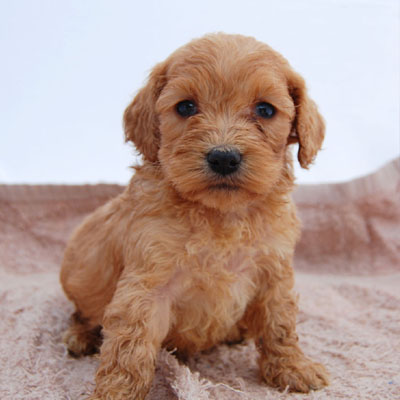

In [5]:
from PIL import Image # le module Pillow (PIL) est supporté par défaut par TorchVision
from IPython.display import display

img = Image.open('images/img.jpg')
display(img)

In [6]:
# prétraitement de l'image
img_t = transform(img)

# échantillon pour qu'il soit transmis sur le réseau
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_t = torch.unsqueeze(img_t, 0)


## étape 4 : Inférence du modèle

- mettez votre modèle en mode évaluation et effectuez l'inférence
- à l'aide de la liste `labels`, contenant les noms des 1000 classes d'imagenet, afficher la prédiction du modèle

In [7]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

**Solution :**

In [8]:
model.eval() # mode évaluation
out = model(batch_t) # inférence du modèle

# out contient la prédiction du modèle pour chacune des 1000 classes d'imagenet
print(out.shape)

torch.Size([1, 1000])


In [9]:
# pour afficher la prédiction du modèle
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item(), '%')

miniature poodle 43.922061920166016 %


In [10]:
# pour afficher les autres classes auquel le modèle penser que l'image appartenais
_, indices = torch.sort(out, descending=True)
print([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

[('miniature poodle', 43.922061920166016), ('Norfolk terrier', 22.48050308227539), ('toy poodle', 14.29472541809082), ('Lakeland terrier', 6.219025611877441), ('Irish terrier', 2.836461067199707)]


## optionnel

affichez la prédiction de différents modèles pour chaque image contenu dans le dossier `images`

**Solution :**



ATuin_1
--------------------------------------------------


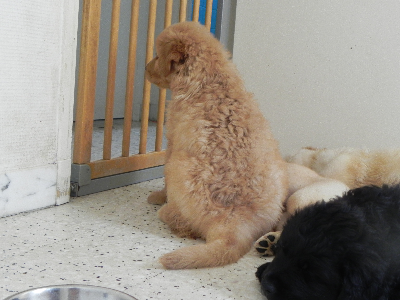

resnet18  36.9% - toy poodle 
alexnet  23.5% - miniature poodle 
vgg16  20.1% - miniature poodle 
squeezenet  34.1% - toy poodle 
densenet  35.9% - Tibetan mastiff 
shufflenet  87.2% - toy poodle 
mobilenet  17.6% - toy poodle 
resnext50_32x4d  41.1% - chow, chow chow 
wide_resnet50_2  38.5% - miniature poodle 
mnasnet  18.6% - soft-coated wheaten terrier 
resnext101_32x8d  83.4% - Newfoundland, Newfoundland dog 


Pesto_1
--------------------------------------------------


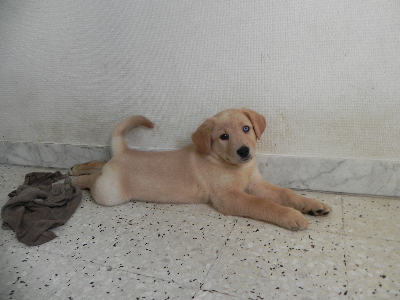

resnet18  81.0% - Labrador retriever 
alexnet  35.6% - Labrador retriever 
vgg16  91.6% - Labrador retriever 
squeezenet  47.7% - Labrador retriever 
densenet  51.2% - Labrador retriever 
shufflenet  58.2% - Labrador retriever 
mobilenet  75.6% - Labrador retriever 
resnext50_32x4d  56.8% - Labrador retriever 
wide_resnet50_2  79.9% - Labrador retriever 
mnasnet  93.2% - Labrador retriever 
resnext101_32x8d  70.7% - Labrador retriever 


Freyja_2
--------------------------------------------------


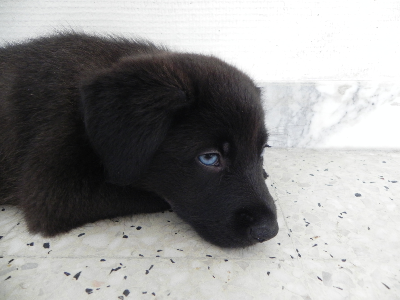

resnet18  56.7% - Newfoundland, Newfoundland dog 
alexnet  64.3% - Newfoundland, Newfoundland dog 
vgg16  34.4% - groenendael 
squeezenet  19.9% - schipperke 
densenet  52.4% - groenendael 
shufflenet  55.9% - groenendael 
mobilenet  41.0% - groenendael 
resnext50_32x4d  31.0% - schipperke 
wide_resnet50_2  78.9% - groenendael 
mnasnet  58.0% - groenendael 
resnext101_32x8d  64.2% - groenendael 


Zion_2
--------------------------------------------------


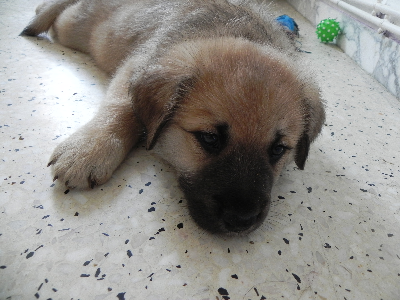

resnet18  51.5% - Pekinese, Pekingese, Peke 
alexnet  43.3% - chow, chow chow 
vgg16  79.5% - Great Pyrenees 
squeezenet  31.7% - Pekinese, Pekingese, Peke 
densenet  24.6% - soft-coated wheaten terrier 
shufflenet  37.5% - Great Pyrenees 
mobilenet  31.4% - Norwegian elkhound, elkhound 
resnext50_32x4d  69.2% - Great Pyrenees 
wide_resnet50_2  39.3% - Great Pyrenees 
mnasnet  39.0% - golden retriever 
resnext101_32x8d  70.5% - Great Pyrenees 


Zion_3
--------------------------------------------------


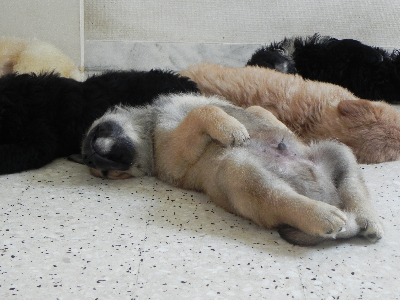

resnet18  19.7% - Eskimo dog, husky 
alexnet  24.2% - Saint Bernard, St Bernard 
vgg16  33.2% - Saint Bernard, St Bernard 
squeezenet  18.4% - Eskimo dog, husky 
densenet  37.9% - Tibetan mastiff 
shufflenet  30.2% - Tibetan mastiff 
mobilenet  19.5% - Border collie 
resnext50_32x4d  29.3% - kuvasz 
wide_resnet50_2  34.8% - German shepherd, German shepherd dog, German police dog, alsatian 
mnasnet  30.2% - Saint Bernard, St Bernard 
resnext101_32x8d  31.4% - Tibetan mastiff 


Freyja_1
--------------------------------------------------


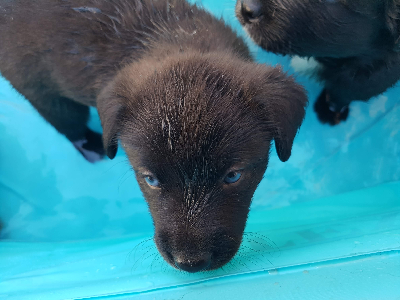

resnet18  17.7% - Siamese cat, Siamese 
alexnet  96.0% - Siamese cat, Siamese 
vgg16  19.4% - groenendael 
squeezenet  29.3% - flat-coated retriever 
densenet  74.2% - groenendael 
shufflenet  20.7% - porcupine, hedgehog 
mobilenet  21.7% - sea lion 
resnext50_32x4d  22.5% - Irish wolfhound 
wide_resnet50_2  66.5% - flat-coated retriever 
mnasnet  20.3% - Labrador retriever 
resnext101_32x8d  72.2% - Labrador retriever 


Freyja_3
--------------------------------------------------


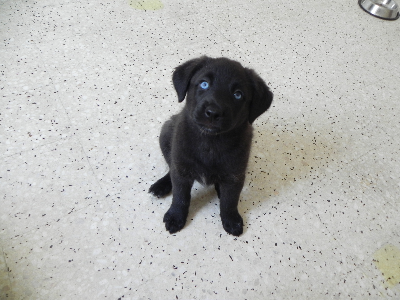

resnet18  19.4% - Labrador retriever 
alexnet  29.0% - schipperke 
vgg16  71.4% - Labrador retriever 
squeezenet  46.1% - schipperke 
densenet  47.8% - Labrador retriever 
shufflenet  38.5% - Labrador retriever 
mobilenet  59.3% - flat-coated retriever 
resnext50_32x4d  37.4% - Labrador retriever 
wide_resnet50_2  39.1% - flat-coated retriever 
mnasnet  59.7% - Labrador retriever 
resnext101_32x8d  43.4% - Labrador retriever 


Zion_1
--------------------------------------------------


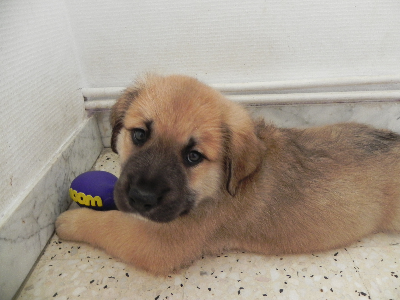

resnet18  46.3% - Leonberg 
alexnet  67.4% - chow, chow chow 
vgg16  22.9% - golden retriever 
squeezenet  78.9% - Pekinese, Pekingese, Peke 
densenet  22.6% - Tibetan mastiff 
shufflenet  25.9% - golden retriever 
mobilenet  29.8% - Leonberg 
resnext50_32x4d  42.4% - German shepherd, German shepherd dog, German police dog, alsatian 
wide_resnet50_2  54.2% - Tibetan mastiff 
mnasnet  53.2% - golden retriever 
resnext101_32x8d  46.6% - Tibetan mastiff 


img
--------------------------------------------------


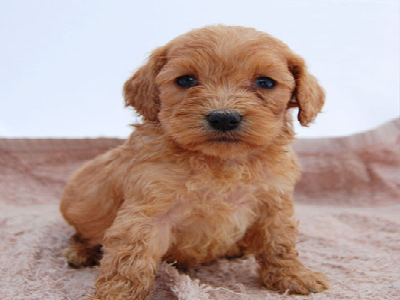

resnet18  41.1% - miniature poodle 
alexnet  84.5% - Norfolk terrier 
vgg16  36.0% - toy poodle 
squeezenet  38.1% - Norfolk terrier 
densenet  44.5% - miniature poodle 
shufflenet  92.7% - Norfolk terrier 
mobilenet  76.6% - Norfolk terrier 
resnext50_32x4d  56.2% - miniature poodle 
wide_resnet50_2  76.2% - toy poodle 
mnasnet  81.5% - Norfolk terrier 
resnext101_32x8d  43.9% - miniature poodle 


Thor_1
--------------------------------------------------


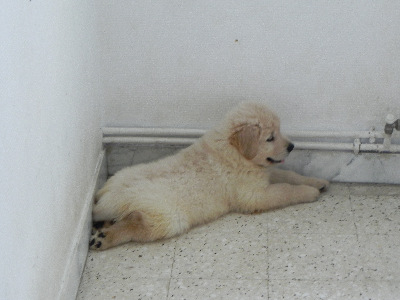

resnet18  48.5% - Great Pyrenees 
alexnet  26.7% - chow, chow chow 
vgg16  36.5% - kuvasz 
squeezenet  28.0% - Great Pyrenees 
densenet  54.4% - kuvasz 
shufflenet  44.6% - golden retriever 
mobilenet  54.4% - kuvasz 
resnext50_32x4d  85.1% - kuvasz 
wide_resnet50_2  70.2% - kuvasz 
mnasnet  68.5% - kuvasz 
resnext101_32x8d  90.6% - kuvasz 


In [11]:
# Ici nous définissons plusieurs modèles de torchvision
import torchvision.models as models

resnet18         = models.resnet18(pretrained=True)
alexnet          = models.alexnet(pretrained=True)
vgg16            = models.vgg16(pretrained=True)
squeezenet       = models.squeezenet1_0(pretrained=True)
densenet         = models.densenet161(pretrained=True)
shufflenet       = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet        = models.mobilenet_v2(pretrained=True)
resnext50_32x4d  = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2  = models.wide_resnet50_2(pretrained=True)
mnasnet          = models.mnasnet1_0(pretrained=True)
resnext101_32x8d = models.resnext101_32x8d(pretrained=True)


import os
for i in os.listdir('images') :
    
    if i[-4:]=='.jpg' :
        print('\n\n', i[:-4], '\n', '-'*50, sep='')
        img = Image.open("images/%s"%i)
        
        display(img.resize((400,300)))

        img_t = transform(img)
        batch_t = torch.unsqueeze(img_t, 0)

        for model, name in zip([resnet18, alexnet, vgg16, squeezenet, densenet,
                                shufflenet, mobilenet, resnext50_32x4d, wide_resnet50_2, mnasnet,
                               resnext101_32x8d],
                               ['resnet18', 'alexnet', 'vgg16', 'squeezenet', 'densenet',
                                'shufflenet', 'mobilenet', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet',
                                'resnext101_32x8d']) :

            print(name, end=' ')

            model.eval()

            out = model(batch_t)
            percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
            _, indices = torch.sort(out, descending=True)

            for idx in indices[0][:1] :
                print(' %.1f%% - %s ' %(percentage[idx].item(), labels[idx]))

# Trouver un label dans un dataset torchvision

affichez des images de chats à partir du dataset STL10 de torchvision

**Solution :**

In [ ]:
import torchvision

image_datasets = torchvision.datasets.STL10('images', download=True, transform=transform)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=100,
                                             shuffle=True, num_workers=4)
#dataset_sizes = len(image_datasets)

In [ ]:
class_names = image_datasets.classes
inputs, classes = next(iter(dataloaders))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.xticks([]) ; plt.yticks([])
    if title is not None: plt.title(title)
    plt.pause(0.001)

#out = torchvision.utils.make_grid(inputs[:8])
#imshow(out, title=[class_names[x] for x in classes[:8]])

for x in range(len(classes)) :
    if class_names[classes[x]]=='cat' :
        out = torchvision.utils.make_grid(inputs[x])
        imshow(out, title=class_names[classes[x]])